In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as an
import scipy
import sklearn
import gget

sc.settings.verbosity = 3  

# Load Data

In [2]:
fpath = "/scratch/indikar_root/indikar1/shared_data/single_cell_fibroblast/scanpy/processed.anndata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

adata

Memory usage: current 2.47 GB, difference +2.47 GB


AnnData object with n_obs × n_vars = 7748 × 14082
    obs: 'n_genes', 'cell', 'G1', 'G2M', 'S', 'pred_phase', 'seurat_S_score', 'seurat_G2M_score', 'is_kegg_score', 'whitfield_G1/S_score', 'whitfield_G2_score', 'whitfield_G2/M_score', 'whitfield_M/G1_score', 'whitfield_S_score', 'GO_G1_score', 'GO_G1/S_score', 'GO_G2_score', 'GO_G2/M_score', 'GO_M_score', 'GO_S_score', 'cell_cycle_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden', 'pred_G1', 'pred_S', 'pred_G2M', 'dpt_pseudotime'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'seurat_S', 'seurat_G2M', 'is_kegg', 'whitfield_G1/S', 'whitfield_G2', 'whitfield_G2/M',

# Extract G1

In [42]:
pdf = adata[adata.obs['pred_phase'] == 'G1', :].copy()

# Create labels for the 11 bins
hour_labels = [i for i in range(1, 12)]

pdf.obs['hour'] = pd.cut(pdf.obs['dpt_pseudotime'], 11, labels=hour_labels)
pdf.obs['hour'].value_counts()

hour
1     2885
5      864
4      288
10     145
9      136
2      113
6       60
3       54
8       46
7       26
11      26
Name: count, dtype: int64

<Axes: xlabel='hour'>

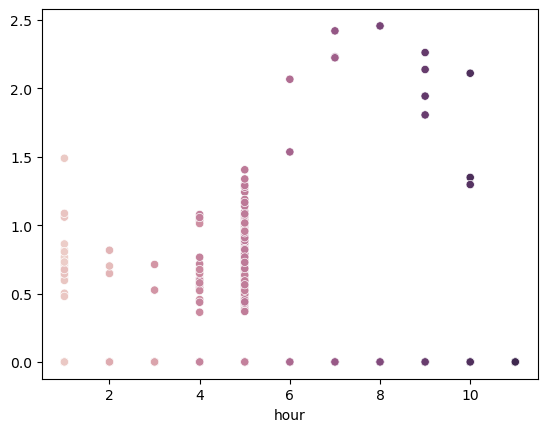

In [52]:
sns.scatterplot(
    data=pdf.obs,
    x='hour',
    y=np.ravel(pdf[:, 'CCND1'].X),
    hue='dpt_pseudotime',
    legend=False,
)

In [ ]:
break

# DPT

In [ ]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['pred_phase'] == 'G1')[0]
sc.tl.dpt(adata)

sc.pl.umap(
    adata, 
    color=['pred_phase', 'dpt_pseudotime']
)

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 3

colors = [
    'r', 'green', 'gold',
]

sns.boxplot(
    data=adata.obs[adata.obs['leiden'].isin(['0', '1'])],
    x='pred_phase',
    y='dpt_pseudotime',
    hue='pred_phase',
    order=['G1', 'S', 'G2M'],
    palette=colors,
    showfliers=False,
    width=0.5,
)

plt.ylabel("Pseudotime")
plt.xlabel("")
sns.despine()

# write the object out

In [ ]:
out_path = "/scratch/indikar_root/indikar1/shared_data/single_cell_fibroblast/scanpy/processed.anndata.h5ad"

for column in adata.var.columns:
    if adata.var[column].dtype == 'object':
        adata.var[column] = adata.var[column].astype(str)

# write the object to file
adata.write(out_path)

adata

In [ ]:
break